In [87]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from plotly.subplots import make_subplots
from tabulate import tabulate

In [88]:
df=pd.read_excel("/content/HR-Data (2).xlsx")

In [89]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [90]:
df.shape

(1470, 44)

In [91]:
df.describe()

,Employee Number,Training Times Last Year,-2,0,Age,CF_attrition count,CF_attrition counts,CF_attrition rate,CF_current Employee,Daily Rate,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,237.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.161224,1.0,0.161224,0.838776,802.485714,...,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,0.0,0.367863,0.367863,403.509100,...,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,1.0,0.000000,0.000000,102.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,0.000000,1.0,0.000000,1.000000,465.000000,...,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,0.000000,1.0,0.000000,1.000000,802.000000,...,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,0.000000,1.0,0.000000,1.000000,1157.000000,...,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1.0,1.000000,1.000000,1499.000000,...,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [92]:
missing=df.isnull().sum().sort_values(ascending=False)
missing

,0
CF_attrition counts,1233
Attrition,0
CF_age band,0
Business Travel,0
Department,0
Education Field,0
emp no,0
Employee Number,0
Gender,0
Job Role,0


In [93]:
(df['CF_attrition count']==df['CF_attrition counts']).value_counts()

,count
False,1233
True,237


In [94]:
df.loc[df['CF_attrition counts'].isna(), ['CF_attrition count', 'CF_attrition counts']].head(10)

,CF_attrition count,CF_attrition counts
1,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN
10,0,NaN
11,0,NaN


In [95]:
df[['CF_attrition count', 'CF_attrition counts']]

,CF_attrition count,CF_attrition counts
0,1,1.0
1,0,NaN
2,1,1.0
3,0,NaN
4,0,NaN
...,...,...
1465,1,1.0
1466,1,1.0
1467,1,1.0
1468,1,1.0


In [96]:
df.drop(columns=['CF_attrition counts'], inplace=True)

In [97]:
df[['-2','0']]

,-2,0
0,-2,0
1,-2,0
2,-2,0
3,-2,0
4,-2,0
...,...,...
1465,-2,0
1466,-2,0
1467,-2,0
1468,-2,0


In [98]:
df.drop(columns=['-2','0'], inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [100]:
df=df.drop_duplicates()

In [101]:
g1=df.groupby('Attrition')[['Monthly Income','Total Working Years','Years At Company']].mean().round(2)
g1

,Monthly Income,Total Working Years,Years At Company
Attrition,,,
No,6832.74,11.86,7.37
Yes,4787.09,8.24,5.13


In [102]:
g2=(df.groupby("Department")["Attrition"].value_counts(normalize=True)*100).round(2)
g2

Department  Attrition
HR          No           80.95
            Yes          19.05
R&D         No           86.16
            Yes          13.84
Sales       No           79.37
            Yes          20.63
Name: proportion, dtype: float64

In [103]:
g3=(df[df["Attrition"]=="Yes"].groupby("Job Role")["Attrition"].value_counts(normalize=True)*100).round(2)
g3

,,proportion
Job Role,Attrition,
Healthcare Representative,Yes,100.0
Human Resources,Yes,100.0
Laboratory Technician,Yes,100.0
Manager,Yes,100.0
Manufacturing Director,Yes,100.0
Research Director,Yes,100.0
Research Scientist,Yes,100.0
Sales Executive,Yes,100.0
Sales Representative,Yes,100.0


In [104]:
g4=pd.crosstab(df['Over Time'], df['Attrition'], margins=True, normalize='index').round(3)
g4

Attrition,No,Yes
Over Time,,
No,0.896,0.104
Yes,0.695,0.305
All,0.839,0.161


In [105]:
g5=pd.crosstab(df['Job Satisfaction'], df['Attrition'], margins=True, normalize='index').round(3)
g5

Attrition,No,Yes
Job Satisfaction,,
1,0.768,0.232
2,0.856,0.144
3,0.856,0.144
4,0.855,0.145
All,0.839,0.161


Visualization


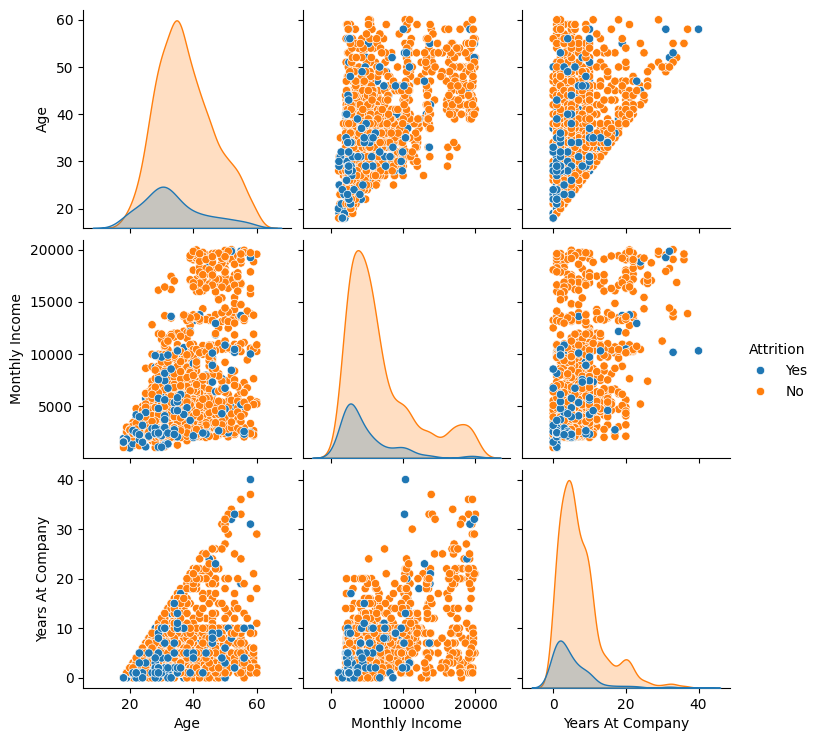

In [106]:
sns.pairplot(df[['Age','Monthly Income','Years At Company','Attrition']], hue='Attrition')
plt.show()


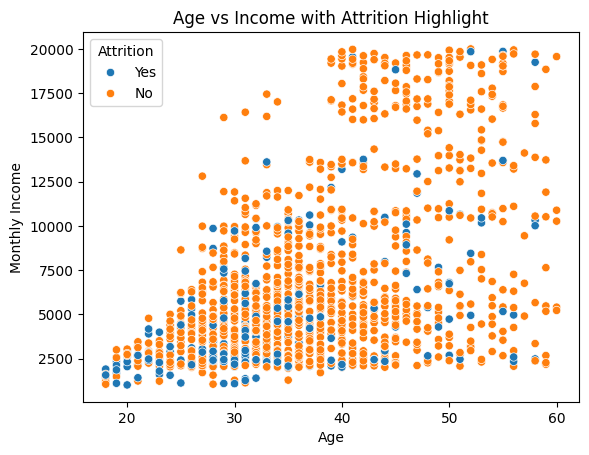

In [107]:
sns.scatterplot(x='Age', y='Monthly Income', hue='Attrition', data=df)
plt.title('Age vs Income with Attrition Highlight')
plt.show()

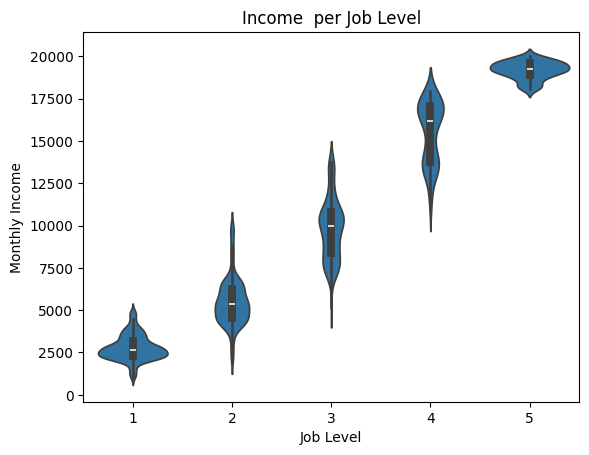

In [117]:
sns.violinplot(x='Job Level', y='Monthly Income', data=df)
plt.title('Income  per Job Level')
plt.show()

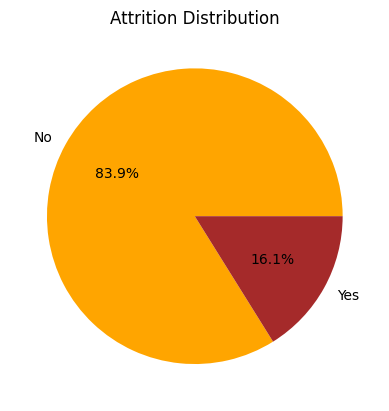

In [109]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'brown'])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

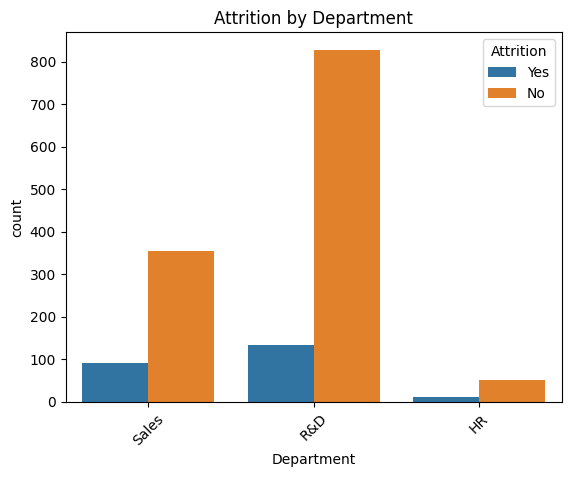

In [110]:
sns.countplot(data=df ,x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

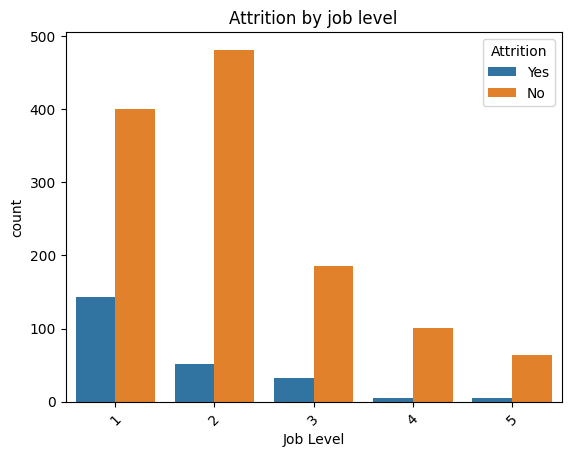

In [111]:
sns.countplot(data=df ,x='Job Level', hue='Attrition')
plt.title('Attrition by job level')
plt.xticks(rotation=45)
plt.show()

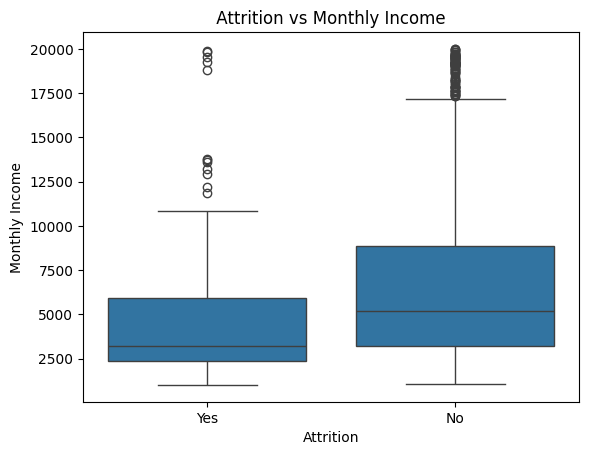

In [112]:
sns.boxplot(data=df , x='Attrition', y='Monthly Income')
plt.title(' Attrition vs Monthly Income ')
plt.show()

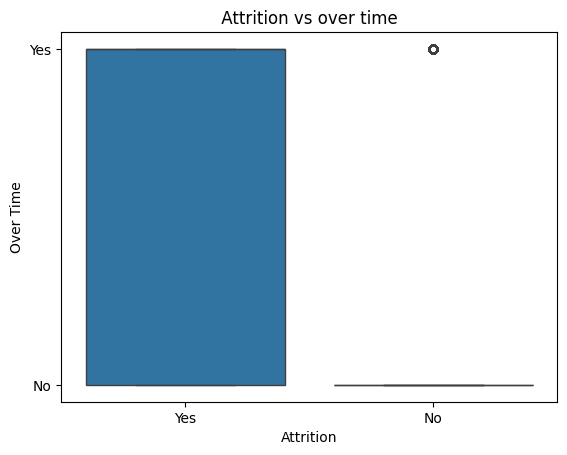

In [113]:
sns.boxplot(data=df , x='Attrition', y='Over Time')
plt.title(' Attrition vs over time ')
plt.show()

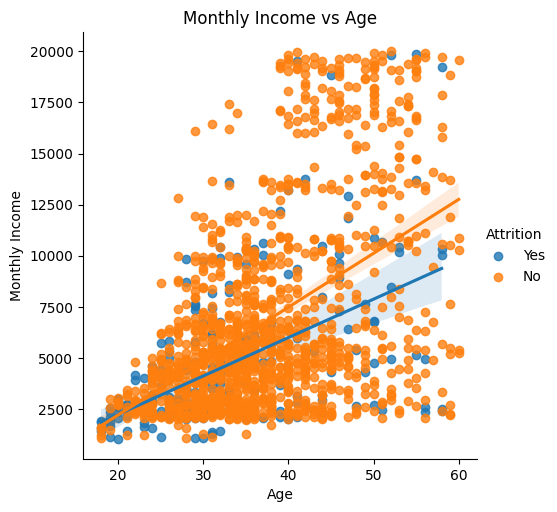

In [114]:
sns.lmplot(data=df ,x='Age', y='Monthly Income', hue='Attrition')
plt.title('Monthly Income vs Age')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning:

30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



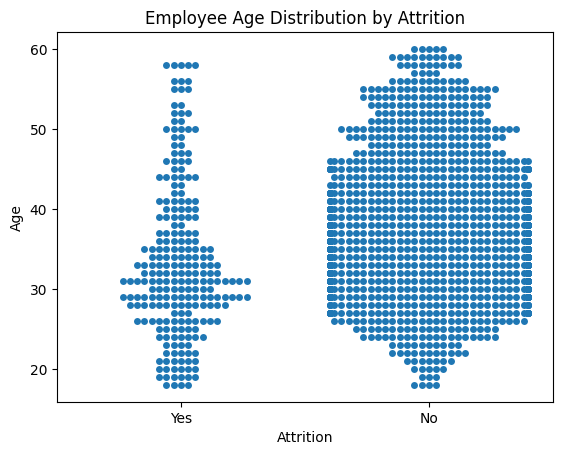

In [115]:
sns.swarmplot(data=df ,x='Attrition', y='Age')
plt.title('Employee Age Distribution by Attrition')
plt.show()

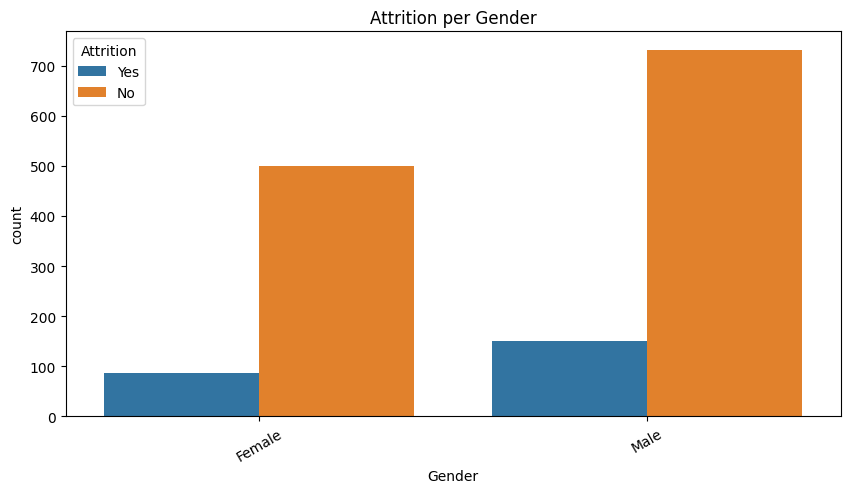

In [119]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition per Gender')
plt.xticks(rotation=30)
plt.show()